## Goal

My goal is to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

# Import modules

In [50]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math
%matplotlib inline


# API for students

In [3]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [4]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

# Evaluating your project

We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [7]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


Data shape:  (1092, 65)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



In [8]:
import pandas as pd
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score

In [40]:
def MyModel(X, other={}):
    # It should create an array of predictions; we initialize it to the empty array for convenience
    
    predictions = []
    
    # YOUR CODE GOES HERE
    DATA_DIR = "./Data"

    if not os.path.isdir(DATA_DIR):
        DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

    data_file = "5th_yr.csv"
    data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )
    
    # numeric data
    df = data
    def to_numeric(df):
        columns = df.select_dtypes(include=['object']).columns
        df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
        return df
    df = to_numeric(df)
    X_train = df.iloc[:,0:64]
    y_train = df['Bankrupt']
    
    # get X_test
    X_test = X
    X_test = to_numeric(X_test)
    X_test = X_test.iloc[:,0:64]
    
    # scaler
    scaler = StandardScaler()

    # use the median for imputation
    imputed_features = SimpleImputer(strategy='median')

    # winsor
    def to_winsorize(df, lower_pct, upper_pct):
        df = pd.DataFrame(df) 
        for column in df.columns:
            lower_limit = np.percentile(df[column], lower_pct)
            upper_limit = np.percentile(df[column], upper_pct)

            df[column][df[column] < lower_limit] = lower_limit
            df[column][df[column] > upper_limit] = upper_limit

        return df.to_numpy()  

    # Create transformers
    polynomial_features = PolynomialFeatures(2)

    # PCA
    pca = PCA(n_components=22) 

    #model
    name = "RandomForest"
    class_weights = {0: 1, 1: 10}
    rf_model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42, class_weight=class_weights)


    #Pipeline
    model_pipeline = Pipeline([
        ('imputer', imputed_features),  # use the median for imputation
        ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
        ('polynomial',polynomial_features),
        ('scaler', scaler),    # scaler
        ('pca', pca),          # PCA
        ('rf', rf_model)       # Random forest
    ])

    model_pipeline.fit(X_train, y_train)
    
    predictions = model_pipeline.predict(X_test) 
    
    return predictions

Exploratory Data Analysis

Converting Data to numeric

In [10]:
for column in data.columns:
    data[column]=pd.to_numeric(data[column],errors="coerce")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

Count Missing value

In [11]:
df = data
X = df.iloc[:,0:64]
y = df['Bankrupt']
X.isna().sum()
y.isna().sum()

X1       2
X2       2
X3       2
X4      15
X5      10
      ... 
X60    220
X61     12
X62      0
X63     15
X64     83
Length: 64, dtype: int64

0

Imbalanced Data

4818

Number of 0 = X1          307
X2          307
X3          307
X4          306
X5          308
           ... 
X62         308
X63         306
X64         295
Bankrupt    308
Id          308
Length: 66, dtype: int64, Number of 1 = X1          4509
X2          4509
X3          4509
X4          4497
X5          4500
            ... 
X62         4510
X63         4497
X64         4440
Bankrupt    4510
Id          4510
Length: 66, dtype: int64


<Axes: xlabel='Bankrupt', ylabel='count'>

<function matplotlib.pyplot.show(close=None, block=None)>

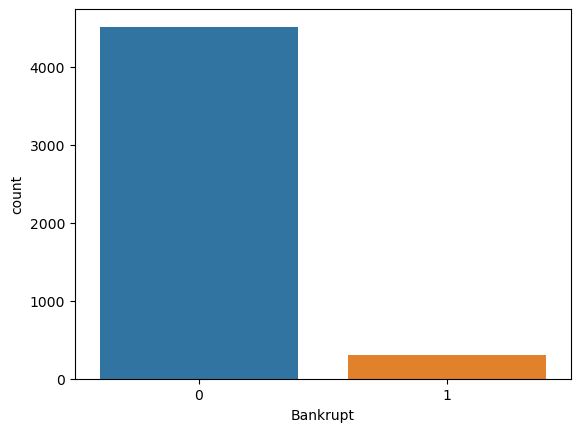

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
data['Bankrupt'].count()
non_bankrupt=data[data["Bankrupt"]==1].count()
bankrupt_count=data[data["Bankrupt"]==0].count()
print("Number of 0 = {c0}, Number of 1 = {c1}".format(c0=non_bankrupt,c1=bankrupt_count))
sns.countplot(x=data['Bankrupt'])
plt.show

Checking Outliers

<Axes: xlabel='X1', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X1')

<Axes: xlabel='X2', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X2')

<Axes: xlabel='X3', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X3')

<Axes: xlabel='X4', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X4')

<Axes: xlabel='X5', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X5')

<Axes: xlabel='X6', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X6')

<Axes: xlabel='X7', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X7')

<Axes: xlabel='X8', ylabel='Bankrupt'>

Text(0.5, 1.0, 'X8')

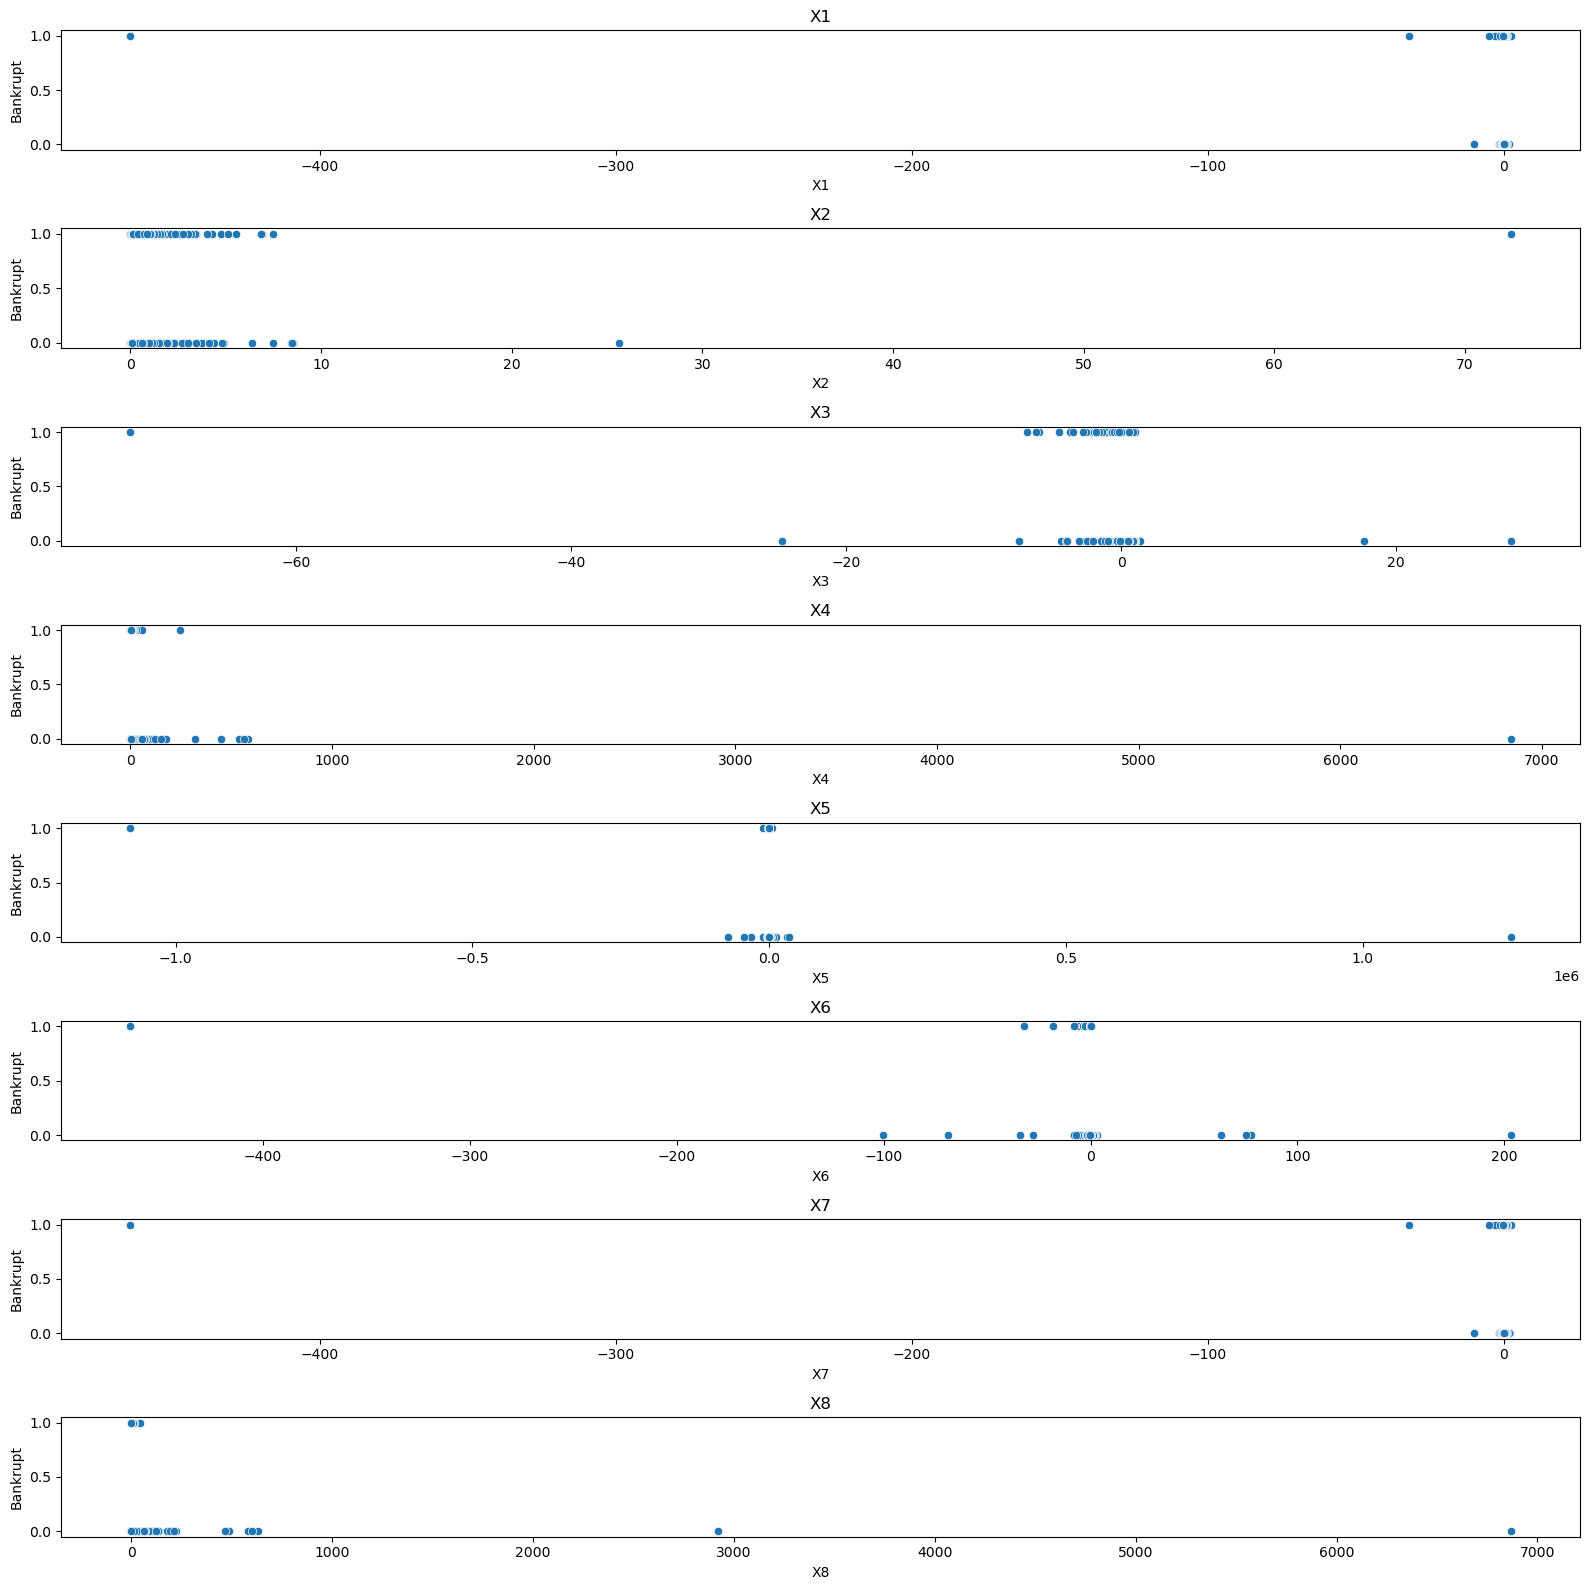

In [13]:
# Using first 8 features as an examples

%matplotlib inline

df = data
def to_numeric(df):
    columns = df.select_dtypes(include=['object']).columns
    df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')
    return df
df = to_numeric(df)

# use the X1-X8 as an example
plot_col = df.columns[:8]
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(16, 16))

# Scatter plot
for i, col in enumerate(plot_col):
    row = i
    sns.scatterplot(x=col, y="Bankrupt", data=df, ax=axes[row])
    axes[row].set_title(col)

plt.tight_layout()
plt.show()

Upon plotting the data, I have noticed that the majority of the features exhibit outlier issues.
To address these outliers, I used the **winsorize** method in the subsequent modeling process to limit the data **within the 5th percentile and 95th percentile range.**

Redundant Feature

<Figure size 1200x1000 with 0 Axes>

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

Text(0.5, 1.0, 'Strong Correlation Matrix')

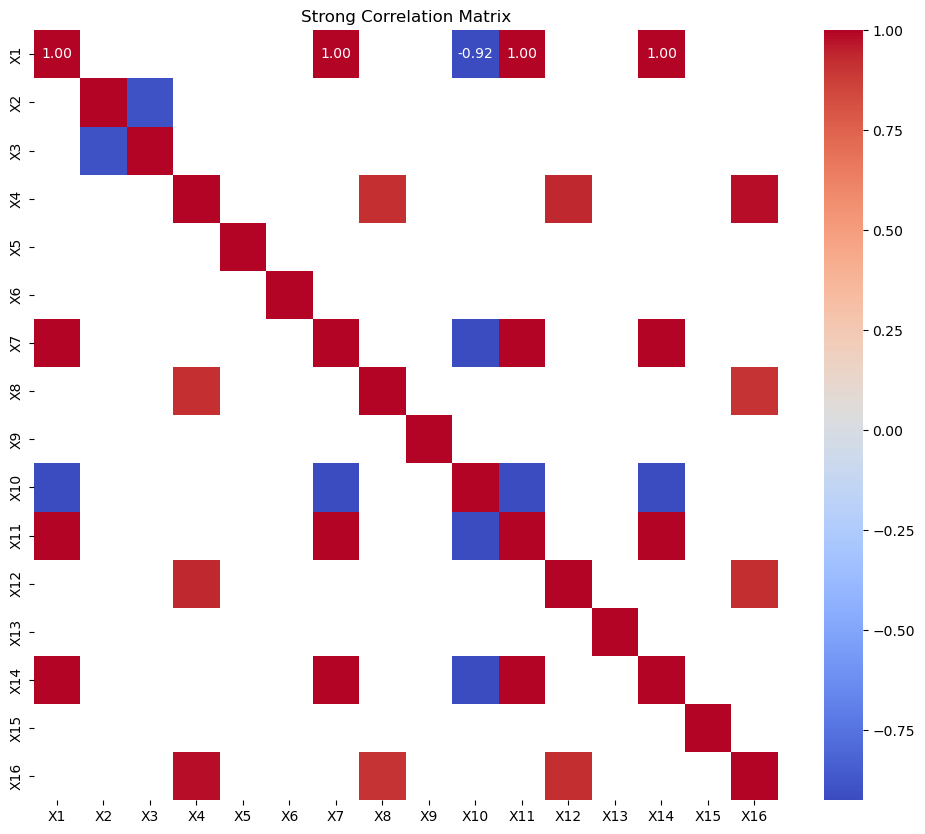

In [14]:
# Strong Correlation Matrix
features = X.iloc[:,0:16]
corr_matrix = features.corr()

threshold = 0.9
strong_corr = corr_matrix[abs(corr_matrix) > threshold]

plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Strong Correlation Matrix')
plt.show()

- I found that the correlation coefficients between different features were often greater than 0.9. As shown in the heatmap, which displays the correlation matrix of the first 16 features, some correlation coefficients even reached almost 1. This suggests that there is redundancy among the features. To address this issue, I used PCA to reduce the dimensionality of the data.

PCA

PCA()

# of components to explain 0.95 variance: 22


<Figure size 800x600 with 0 Axes>

Text(0.5, 0, 'Principal Component')

Text(0, 0.5, 'Variance Explained')

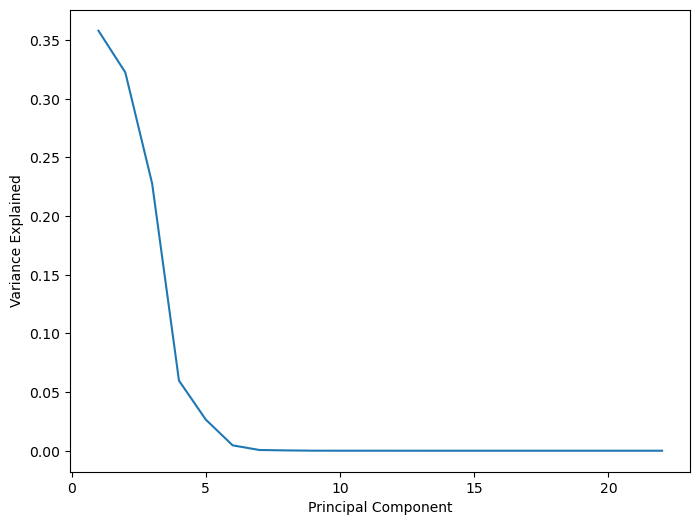

<Figure size 800x600 with 0 Axes>

Text(0.5, 1.0, 'Cumulative Variance Explained')

Text(0.5, 0, '# of Components')

Text(0, 0.5, 'Cumulative Variance Explained')

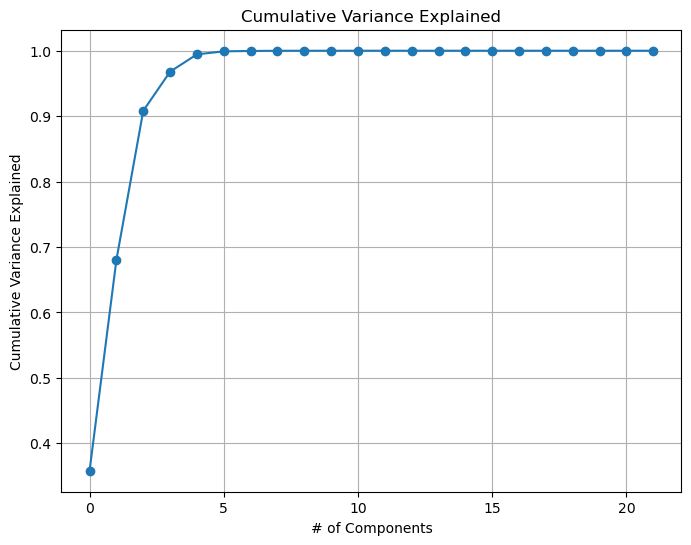

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df.iloc[:,0:64]
y = df['Bankrupt']

np.random.seed(42)

# inputer
impute = SimpleImputer(strategy='median')
impute_X = impute.fit_transform(X)

# Standardize
scaler = StandardScaler()
scaled_data = scaler.fit_transform(impute_X)

pca = PCA(n_components=None)
pca.fit(scaled_data)

# cum_variance
cum_var = np.cumsum(pca.explained_variance_ratio_)

# target variance 0.95
target_var = 0.95
n_components = np.argmax(cum_var >= target_var)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(impute_X)

print(f"# of components to explain {target_var} variance: {n_components}")

# explained_var
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, n_components + 1), explained_var)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.show()

# cum_var
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(cum_var, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

PCA for dimensionality reduction
- be able to capture 95% of the cumulative variance using approximately 22 synthetic features.
- As shown in the figure of Cumulative Variance Explained, the first two components of PCA explain more than 50% of the variance.

Model Selection and Training 

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# winsor
def to_winsorize(df, lower_pct, upper_pct):
    df = pd.DataFrame(df) 
    for column in df.columns:
        lower_limit = np.percentile(df[column], lower_pct)
        upper_limit = np.percentile(df[column], upper_pct)
        
        df[column][df[column] < lower_limit] = lower_limit
        df[column][df[column] > upper_limit] = upper_limit

    return df.to_numpy()  
    
#imputation 
imputed_features = SimpleImputer(strategy='median')

#PCA
pca = PCA()

#Scaler
scaler = StandardScaler()

In [17]:
from sklearn.naive_bayes import GaussianNB


# use the median for imputation
imputed_features = SimpleImputer(strategy='median')

# model
nb_model = GaussianNB()
name = "GaussianNB"

# Pipeline
model_pipeline_nb = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('nb', nb_model)     
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline_nb.fit(X_train, y_train)

# in sample
y_train_pred = model_pipeline_nb.predict(X_train)
score_in_sample = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} in-sample Accuracy={s:3.2f}\n".format(m=name, s=score_in_sample))

# out of sample
y_test_pred = model_pipeline_nb.predict(X_test)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('nb', GaussianNB())])

Model: GaussianNB in-sample Accuracy=0.13



	GaussianNB out-of-sample Accuracy: 15.7%, Recall 92.9%, Precision 7.4%


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

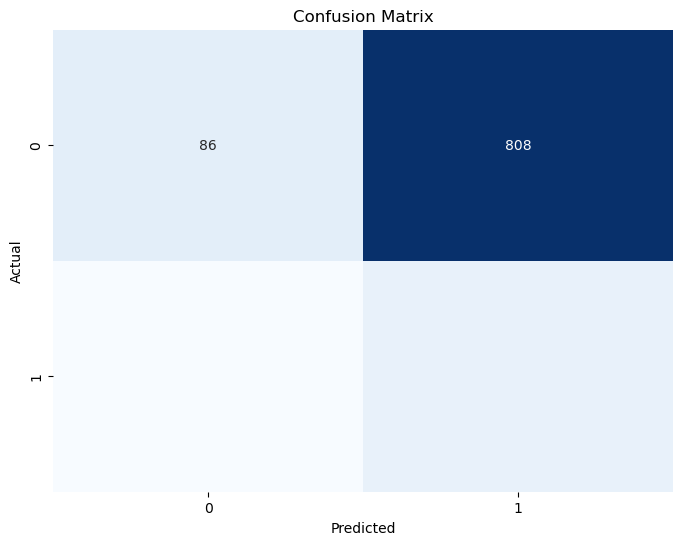

In [18]:
# out of sample
y_test_pred = model_pipeline_nb.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test, y_test_pred, pos_label=1, average="binary")

print("\t{m:s} out-of-sample Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

# confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
errors = X_test.copy()
errors
errors['True Label'] = y_test
errors['Predicted Label'] = y_test_pred
errors['Correct'] = errors['True Label'] == errors['Predicted Label']
false_positives = errors[(errors['True Label'] == 0) & (errors['Predicted Label'] == 1)]
false_negatives = errors[(errors['True Label'] == 1) & (errors['Predicted Label'] == 0)]
false_negatives

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
4340,0.001173,0.672030,0.142270,1.2156,-49.408,0.016824,0.001271,0.48075,1.00740,0.32308,...,19985.00,0.007312,0.003629,0.99269,0.037272,12.3020,4.0442,140.440,2.5991,8.6745
1221,0.139630,0.250810,0.258480,2.2523,31.714,0.000000,0.182390,2.98710,1.54600,0.74919,...,2443.90,0.124670,0.186370,0.88279,0.044616,11.2790,5.1096,48.732,7.4899,2.8891
2083,0.147600,0.097863,0.469870,6.4957,59.981,0.003564,0.181560,9.21840,1.44620,0.90214,...,19041.00,0.123660,0.163620,0.87543,0.000000,5.5314,6.8732,21.578,16.9160,3.2526
1044,0.032618,0.743750,0.052153,1.1584,-49.698,0.111270,0.044782,0.33163,1.05450,0.24665,...,4087.90,0.051681,0.132240,0.94832,1.680600,6.5521,33.0650,59.524,6.1319,3.2633
2555,0.022155,0.548750,0.540930,2.8668,14.402,0.000000,0.022155,0.82231,0.61232,0.45125,...,4408.80,0.066985,0.049097,0.96466,0.558330,1.1969,2.5829,172.720,2.1132,3.6164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.030433,0.581410,0.060936,1.1062,-61.015,0.013893,0.037391,0.55831,1.02850,0.32461,...,2384.80,0.027695,0.093753,0.97231,0.023246,5.2273,6.5361,118.160,3.0889,4.8537
1634,0.053618,0.158140,0.408390,3.5824,129.870,0.304040,0.053618,4.33710,1.01050,0.68587,...,8596.60,0.010359,0.078176,0.98964,0.000000,7.2793,4.1441,66.447,5.4931,2.0040
367,0.007538,0.375340,0.150890,1.4020,3.579,0.473650,0.008802,1.66420,2.23150,0.62466,...,210.59,0.009808,0.012068,0.99606,0.000000,17.2380,6.3463,61.394,5.9452,4.7101
2201,0.135330,0.253700,0.425540,2.6773,-12.682,0.726540,0.167540,2.91340,1.06940,0.73914,...,3376.30,0.064917,0.183090,0.93508,0.000000,4.2401,11.5190,44.400,8.2207,6.5021


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X58,X59,X60,X61,X62,X63,X64,True Label,Predicted Label,Correct
577,-463.890000,0.000000,0.00000,NaN,0.000,-463.890000,-463.890000,NaN,0.87160,266.860000,...,1.14730,0.000000,6.9498,NaN,0.000,NaN,28999.0000,1,0,False
677,-0.405880,2.157500,-1.57630,0.25320,-287.520,-0.405880,-0.405880,-0.61162,0.87205,-1.319600,...,1.14670,-0.035435,9.1461,7.7192,371.910,0.98141,4.4494,1,0,False
746,-0.051465,0.904630,-0.56854,0.27253,-72.373,-0.771050,-0.051465,0.10543,3.31330,0.095374,...,0.98903,0.000000,22.3900,1081.0000,86.095,4.23950,4.2099,1,0,False
2778,0.023165,0.036991,0.95416,26.79400,287.130,0.023165,0.034047,23.65000,1.00040,0.874830,...,0.99958,0.000000,14.3590,7.0271,12.305,29.66300,123.8000,1,0,False
2361,-0.022923,0.041173,0.87637,22.28500,83.040,0.000000,-0.022923,23.28600,1.41600,0.958770,...,1.01560,0.000000,2.5539,25.2350,10.613,34.39000,17.1370,1,0,False


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,True Label,Predicted Label
count,5.000000,5.000000,5.000000,4.000000,5.00000,5.000000,5.000000,4.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.0,5.0
mean,-92.869421,0.628059,-0.062862,12.401183,2.05540,-93.008753,-92.867244,11.607453,1.494670,53.493875,...,-0.393570,1.059642,-0.007087,11.079760,280.245325,96.184600,17.318478,5829.719260,1.0,0.0
std,207.406879,0.935940,1.056722,14.136486,210.48976,207.329177,207.408098,13.699315,1.040886,119.278793,...,0.811574,0.080306,0.015847,7.618413,533.902926,157.905082,17.144324,12952.118798,0.0,0.0
min,-463.890000,0.000000,-1.576300,0.253200,-287.52000,-463.890000,-463.890000,-0.611620,0.871600,-1.319600,...,-1.738400,0.989030,-0.035435,2.553900,7.027100,0.000000,0.981410,4.209900,1.0,0.0
25%,-0.405880,0.036991,-0.568540,0.267697,-72.37300,-0.771050,-0.405880,-0.073833,0.872050,0.095374,...,-0.539610,0.999580,0.000000,6.949800,7.546175,10.613000,3.424977,4.449400,1.0,0.0
50%,-0.051465,0.041173,0.000000,11.278765,0.00000,-0.405880,-0.051465,11.695715,1.000400,0.874830,...,-0.023908,1.015600,0.000000,9.146100,16.477100,12.305000,16.951250,17.137000,1.0,0.0
75%,-0.022923,0.904630,0.876370,23.412250,83.04000,0.000000,-0.022923,23.377000,1.416000,0.958770,...,0.026479,1.146700,0.000000,14.359000,289.176250,86.095000,30.844750,123.800000,1.0,0.0
max,0.023165,2.157500,0.954160,26.794000,287.13000,0.023165,0.034047,23.650000,3.313300,266.860000,...,0.307590,1.147300,0.000000,22.390000,1081.000000,371.910000,34.390000,28999.000000,1.0,0.0


/var/folders/3r/7cf0xpss5jb7pyzjvfv1ww000000gn/T/ipykernel_33625/327592911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(false_negatives['X1'], kde=True)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='X1', ylabel='Density'>

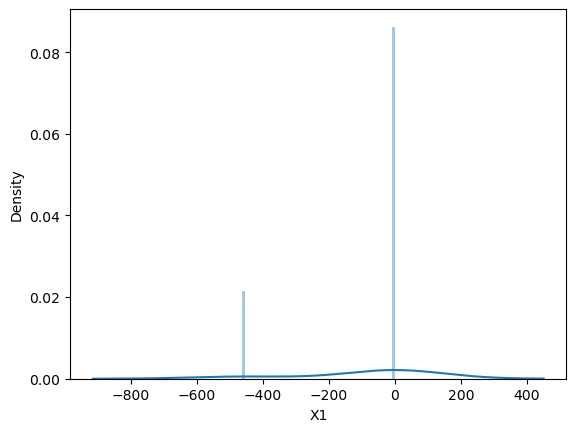

In [20]:
false_negatives.describe()
sns.distplot(false_negatives['X1'], kde=True)
plt.show()

Next, I employed a total of 5 models: 
- **Logistic Regression**
- **Random Forest**
- **AdaBoost**
- **Gradient Boosting** 

Improvements:
- I use class_weight to change the loss function to deal with imbalanced data.
- I Select the most suitable hyperparameters using cross-validation.

Based on the accuracy score and recall score, all of these models perform better than the baseline. I have ultimately chosen the random forest as the best model. In the next section, I will further improve the random forest.

Logistic Regression Model 

In [22]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [23]:
# scaler
scaler = StandardScaler()

# use the median for imputation
imputed_features = SimpleImputer(strategy='median')

# winsor
def to_winsorize(df, lower_pct, upper_pct):
    df = pd.DataFrame(df) 
    for column in df.columns:
        lower_limit = np.percentile(df[column], lower_pct)
        upper_limit = np.percentile(df[column], upper_pct)
        
        df[column][df[column] < lower_limit] = lower_limit
        df[column][df[column] > upper_limit] = upper_limit

    return df.to_numpy()  

# Create transformers
polynomial_features = PolynomialFeatures(2)

# PCA
pca = PCA(n_components=22) 

In [24]:
#model
logistic_clf = LogisticRegression(solver="liblinear",max_iter=10000)
#Pipeline
model_pipeline_lg = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial',polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('clf', logistic_clf)       # clf
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_pipeline_lg.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('winsorize',
                 FunctionTransformer(func=<function to_winsorize at 0x14752a480>,
                                     kw_args={'lower_pct': 5,
                                              'upper_pct': 95})),
                ('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=22)),
                ('clf',
                 LogisticRegression(max_iter=10000, solver='liblinear'))])

In [25]:
#in sample
logistic_y_predict_train = model_pipeline_lg.predict(X_train)
logistic_y_predict_test = model_pipeline_lg.predict(X_test)
score_in_sample = accuracy_score(y_train, logistic_y_predict_train)
print("Model:{m:s} In sample accuracy={s:%}\n".format(m="logistic",s=score_in_sample))

Model:logistic In sample accuracy=93.772704%



In [26]:
#out of sample
def calculate_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

logistic_scores = calculate_scores(y_test, logistic_y_predict_test)
logistic_scores 

{'Accuracy': 0.9273858921161826,
 'Precision': 0.5,
 'Recall': 0.14285714285714285}

Error Analysis

<Axes: >

Text(0.5, 23.52222222222222, 'predited label')

Text(50.72222222222221, 0.5, 'true label')

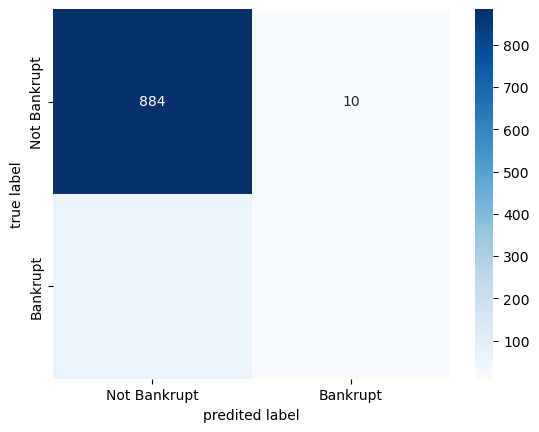

In [27]:
cm2 = confusion_matrix(y_test, logistic_y_predict_test)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Bankrupt', 'Bankrupt'], yticklabels=['Not Bankrupt', 'Bankrupt'])
plt.xlabel('predited label')
plt.ylabel('true label')

Comparing the result of LogisticRegression to the GaussianND, we have much higher precision and our accuracy scores, but our recall score drops about 78% to around 14%. I think such a lower recall rate isn't a reasonable tradeoff and we should adjust it. 

Random Forest 

Idea:
Using class_weight to deal with imbalanced data.
Selecting the most suitable hyperparameters using cross-validation.

In [28]:
# model
name = "RandomForest"
class_weights = {0: 1, 1: 10}
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, class_weight=class_weights)

# n_estimators
param_grid = {
    'rf__n_estimators': [50,100,150,200]  
}


# Pipeline
model_pipeline_rf = Pipeline([
    ('imputer', imputed_features),  
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial',polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('rf', rf_model)       # Random forest
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV 
grid_search_rf = GridSearchCV(estimator=model_pipeline_rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Best model
best_model_rf = grid_search_rf.best_estimator_

best_n = grid_search_rf.best_params_['rf__n_estimators']
print(f"Best n_estimators: {best_n}")


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('winsorize',
                                        FunctionTransformer(func=<function to_winsorize at 0x14752a480>,
                                                            kw_args={'lower_pct': 5,
                                                                     'upper_pct': 95})),
                                       ('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=22)),
                                       ('rf',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 10},
                                                               n_estimators=300,
                                                               random_state=42))]),
             param_grid={'rf__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

Best n_estimators: 100


Model: RandomForest In-sample Accuracy=100.0%



{'Accuracy': 0.9273858921161826,
 'Precision': 0.5,
 'Recall': 0.07142857142857142}

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

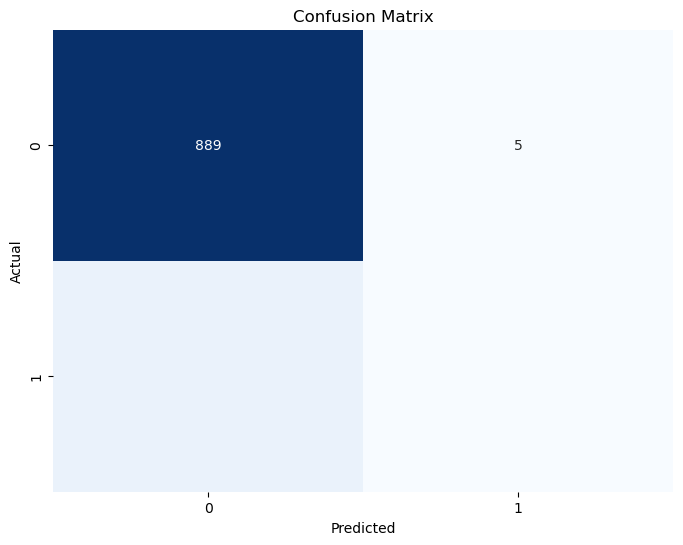

In [29]:
# in sample
y_train_pred = best_model_rf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} In-sample Accuracy={s:3.1%}\n".format(m=name, s=accuracy_train))


# out of sample
y_rf_test_pred = best_model_rf.predict(X_test)

def calculate_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true,y_pred)
    recall = recall_score(y_true,y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

randomforest_scores = calculate_scores(y_test, y_rf_test_pred)
randomforest_scores 


# confusion_matrix
cm = confusion_matrix(y_test, y_rf_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Drawbacks:
The Random Forest model is experiencing a severe **overfitting issue**, since the in-sample accuracy score is much higher than the out-of-sample accuracy score.
At the same time, the **recall score is very low**, which means that many examples labeled as 1 have been incorrectly classified as 0, which will cost a lot. 

AdaBoost Model

In [30]:
# model
name = "adaboost"
adaboost_model = AdaBoostClassifier(random_state=42)

# n_estimators
param_grid = {
    'adaboost__n_estimators': [50,100,150,200]  # AdaBoost n_estimators
}

# Pipeline
model_pipeline_ada = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial', polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('adaboost', adaboost_model)  # AdaBoost
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# GridSearchCV
grid_search_ada = GridSearchCV(estimator=model_pipeline_ada, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train, y_train)


# Best model
best_model_ada = grid_search_ada.best_estimator_

best_n = grid_search_ada.best_params_['adaboost__n_estimators']
print(f"Best n_estimators: {best_n}")

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('winsorize',
                                        FunctionTransformer(func=<function to_winsorize at 0x14752a480>,
                                                            kw_args={'lower_pct': 5,
                                                                     'upper_pct': 95})),
                                       ('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=22)),
                                       ('adaboost',
                                        AdaBoostClassifier(random_state=42))]),
             param_grid={'adaboost__n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

Best n_estimators: 150


Model: adaboost In-sample Accuracy=100.0%



{'Accuracy': 0.9221991701244814,
 'Precision': 0.41379310344827586,
 'Recall': 0.17142857142857143}

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

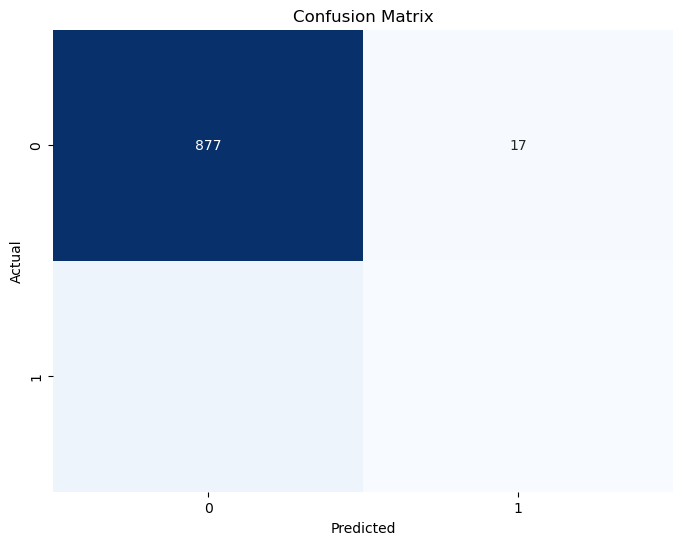

In [31]:
# in sample
ad_y_train_pred = best_model_ada.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} In-sample Accuracy={s:3.1%}\n".format(m=name, s=accuracy_train))


# out of sample
ad_y_test_pred = best_model_ada.predict(X_test)
def calculate_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

adaboost_scores = calculate_scores(y_test, ad_y_test_pred )
adaboost_scores
         
# confusion_matrix
cm = confusion_matrix(y_test, ad_y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Gradient Boosting Model

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting Classifier

# model
name = "Gradient Boosting"
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


# Pipeline
model_pipeline_gb = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial', polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('gradientboost', gb_clf)  # AdaBoost
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_pipeline_gb.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('winsorize',
                 FunctionTransformer(func=<function to_winsorize at 0x15fd09d00>,
                                     kw_args={'lower_pct': 5,
                                              'upper_pct': 95})),
                ('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=22)),
                ('gradientboost', GradientBoostingClassifier(random_state=42))])

Model: Gradient Boosting In-sample Accuracy=94.9%



{'Accuracy': 0.9242738589211619,
 'Precision': 0.4,
 'Recall': 0.08571428571428572}

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

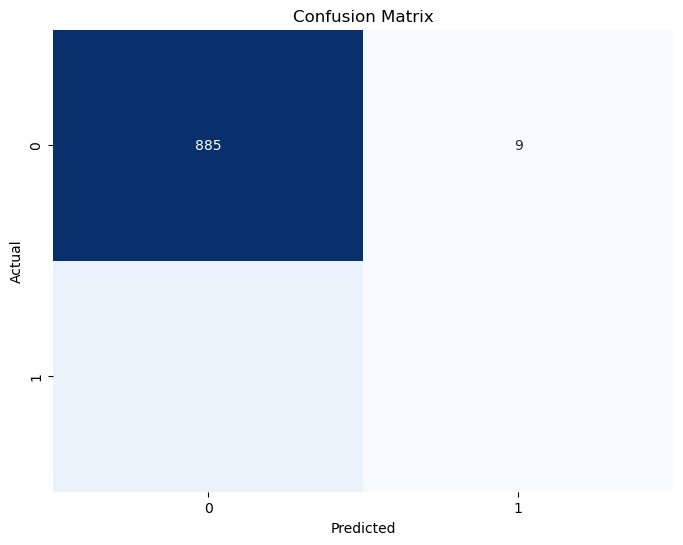

In [55]:
# in sample
gb_y_train_pred = model_pipeline_gb.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} In-sample Accuracy={s:3.1%}\n".format(m=name, s=accuracy_train))


# out of sample
gb_y_test_pred = model_pipeline_gb.predict(X_test)
def calculate_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall}

gb_scores = calculate_scores(y_test, gb_y_test_pred )
gb_scores
         
# confusion_matrix
cm = confusion_matrix(y_test, gb_y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Fine Tuning

Improve Random Forest

Based on the analysis from the previous section, Random Forest performs relatively well but suffers severe overfitting issues. Additionally, the recall score is very low, indicating that it misclassifies some ture one as zero. For this situation of default prediction, the cost of such errors is severe. 
Therefore, I aimed to further enhance the performance of Random Forest to **reduce overfitting and increase the recall score**. I mainly achieved this by selecting the **max_depth** parameter and addressing the data imbalance issue through **resampling**.

In [32]:
# model
name = "RandomForest"
class_weights = {0: 1, 1: 10}
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight=class_weights)

# n_estimators
param_grid = {
    'rf__n_estimators': [50,100,150],
    'rf__max_depth': [3,5,7]
}

# score
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

# Pipeline
model_pipeline_rf2 = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial',polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('rf', rf_model)       # Random forest
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GridSearchCV 
grid_search_rf2 = GridSearchCV(estimator=model_pipeline_rf2, param_grid=param_grid, cv=5, scoring=scoring, refit='accuracy')
grid_search_rf2.fit(X_train, y_train)

# Best model
best_model_rf2 = grid_search_rf2.best_estimator_

print("Best max_depth: ", grid_search_rf2.best_params_['rf__n_estimators'])
print("Best max_depth: ", grid_search_rf2.best_params_['rf__max_depth'])


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(strategy='median')),
                                       ('winsorize',
                                        FunctionTransformer(func=<function to_winsorize at 0x14752a480>,
                                                            kw_args={'lower_pct': 5,
                                                                     'upper_pct': 95})),
                                       ('polynomial', PolynomialFeatures()),
                                       ('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=22)),
                                       ('rf',
                                        RandomForestClassifier(class_weight={0: 1,
                                                                             1: 10},
                                                               max_depth=5,
                                                               random_state=42))]),
             param_grid={'rf__max_depth': [3, 5, 7],
                         'rf__n_estimators': [50, 100, 150]},
             refit='accuracy',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'precision': make_scorer(precision_score),
                      'recall': make_scorer(recall_score)})

Best max_depth:  50
Best max_depth:  7


In [33]:
# in sample
y_train_pred = best_model_rf2.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} In-sample Accuracy={s:3.1%}\n".format(m=name, s=accuracy_train))

Model: RandomForest In-sample Accuracy=95.0%



	RandomForest Out-of-sample Accuracy: 90.9%, Recall 37.1%, Precision 37.1%


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted')

Text(70.72222222222221, 0.5, 'Actual')

Text(0.5, 1.0, 'Confusion Matrix')

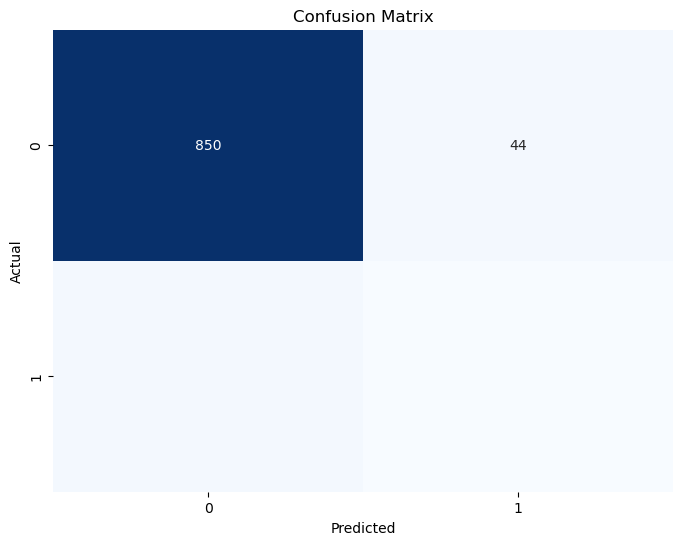

In [34]:
# out of sample
y_test_pred = best_model_rf2.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,  y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Out-of-sample Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )
# confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [36]:
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

#model
name = "RandomForest"
class_weights = {0: 1, 1: 10}
rf_model = RandomForestClassifier(n_estimators=150, max_depth=7, random_state=42, class_weight=class_weights)


#Pipeline
model_pipeline_rf3 = Pipeline([
    ('imputer', imputed_features),  # use the median for imputation
    ('winsorize', FunctionTransformer(to_winsorize, kw_args={'lower_pct': 5, 'upper_pct': 95})),
    ('polynomial',polynomial_features),
    ('scaler', scaler),    # scaler
    ('pca', pca),          # PCA
    ('rf', rf_model)       # Random forest
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

model_pipeline_rf3.fit(X_resampled, y_resampled)

#in sample
y_train_pred = model_pipeline_rf3.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print("Model: {m:s} In-sample Accuracy={s:3.1%}\n".format(m=name, s=accuracy_train))


#out of sample
y_test_pred = model_pipeline_rf3.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,  y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Out-of-sample Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('winsorize',
                 FunctionTransformer(func=<function to_winsorize at 0x14752a480>,
                                     kw_args={'lower_pct': 5,
                                              'upper_pct': 95})),
                ('polynomial', PolynomialFeatures()),
                ('scaler', StandardScaler()), ('pca', PCA(n_components=22)),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=7,
                                        n_estimators=150, random_state=42))])

Model: RandomForest In-sample Accuracy=44.2%

	RandomForest Out-of-sample Accuracy: 44.8%, Recall 92.9%, Precision 11.0%


I think recall rate here is good to take but need more adjustments with Accuracy and Precision. 